# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

# Battery B0005

In [ ]:
df = pd.read_csv('C:/Users/ibrah/Desktop/Masters/Dissertation Data Analysis - VS Code/vars_b5.csv')

In [3]:
df

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
0,1,1,0,0,charge,24,08:17.9,3.873017,-0.001201,24.655358,0.000,0.003,0.000,1.856487
1,1,1,0,1,charge,24,08:17.9,3.479394,-4.030268,24.666480,-4.036,1.570,2.532,1.856487
2,1,1,0,2,charge,24,08:17.9,4.000588,1.512731,24.675394,1.500,4.726,5.500,1.856487
3,1,1,0,3,charge,24,08:17.9,4.012395,1.509063,24.693865,1.500,4.742,8.344,1.856487
4,1,1,0,4,charge,24,08:17.9,4.019708,1.511318,24.705069,1.500,4.753,11.125,1.856487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591453,338,170,615,0,charge,24,09:42.0,0.236356,-0.003484,23.372048,0.000,0.003,0.000,NaN
591454,338,170,615,1,charge,24,09:42.0,0.003365,-0.001496,23.369434,0.000,0.003,2.547,NaN
591455,338,170,615,2,charge,24,09:42.0,4.985137,0.000506,23.386535,0.000,5.002,5.500,NaN
591456,338,170,615,3,charge,24,09:42.0,4.984720,0.000442,23.386983,-0.002,5.002,8.312,NaN


In [ ]:
#View only one registry per cycle (charge and discharge)
cycles = df.filter(['cycle','cycle_type','type','Capacity']).drop_duplicates()
cycles

,cycle,cycle_type,type,Capacity
0,1,1,charge,1.856487
789,2,1,discharge,1.856487
986,3,2,charge,1.846327
1926,4,2,discharge,1.846327
2122,5,3,charge,1.835349
...,...,...,...,...
583759,334,168,charge,1.309015
587251,335,167,discharge,1.309015
587549,336,169,charge,1.325079
591153,337,168,discharge,1.325079


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591458 entries, 0 to 591457
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cycle                 591458 non-null  int64  
 1   cycle_type            591458 non-null  int64  
 2   cycle_idx             591458 non-null  int64  
 3   index                 591458 non-null  int64  
 4   type                  591458 non-null  object 
 5   ambient_temperature   591458 non-null  int64  
 6   timestamp             591458 non-null  object 
 7   Voltage_measured      591458 non-null  float64
 8   Current_measured      591458 non-null  float64
 9   Temperature_measured  591458 non-null  float64
 10  Current               591458 non-null  float64
 11  Voltage               591458 non-null  float64
 12  Time                  591458 non-null  float64
 13  Capacity              591453 non-null  float64
dtypes: float64(7), int64(5), object(2)
memory usage: 63.

# Charge Cycle Variables

list of charge Variables:
1 Voltage_measured
2 Voltage_time_relationship
3 Current_measured
4 Current_measured_time_relationship
5 Temperature_measured
6 Temperature_measured_time_relationship
7 Current_charge
8 Current_charge_time_relationship
9 Voltage_charge
10 Voltage_charge_time_relationship
11 max_time_per_charge_cycle

In [9]:
# Charge cycles
ch = df.query('type =="charge"')
ch

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
0,1,1,0,0,charge,24,08:17.9,3.873017,-0.001201,24.655358,0.000,0.003,0.000,1.856487
1,1,1,0,1,charge,24,08:17.9,3.479394,-4.030268,24.666480,-4.036,1.570,2.532,1.856487
2,1,1,0,2,charge,24,08:17.9,4.000588,1.512731,24.675394,1.500,4.726,5.500,1.856487
3,1,1,0,3,charge,24,08:17.9,4.012395,1.509063,24.693865,1.500,4.742,8.344,1.856487
4,1,1,0,4,charge,24,08:17.9,4.019708,1.511318,24.705069,1.500,4.753,11.125,1.856487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591453,338,170,615,0,charge,24,09:42.0,0.236356,-0.003484,23.372048,0.000,0.003,0.000,NaN
591454,338,170,615,1,charge,24,09:42.0,0.003365,-0.001496,23.369434,0.000,0.003,2.547,NaN
591455,338,170,615,2,charge,24,09:42.0,4.985137,0.000506,23.386535,0.000,5.002,5.500,NaN
591456,338,170,615,3,charge,24,09:42.0,4.984720,0.000442,23.386983,-0.002,5.002,8.312,NaN


In [ ]:
#Delete inconsistent charge cycles (12, 33)
del_cycles = [12, 33, 170]
ch1 = ch[~ch['cycle_type'].isin(del_cycles)]

## Voltage measured VS Time - Charge

In [11]:
# Group the data by "cycle" and find the maximum voltage measured and its corresponding time
# max_values = ch1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])
max_values = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])

# Reset the index of the resulting DataFrame
max_values.reset_index(drop=True, inplace=True)

# Extract the maximum voltage measured and time values
max_voltages = max_values['Voltage_measured']
max_time = max_values['Time']

C:\Users\ibrah\AppData\Local\Temp\ipykernel_17096\1385262537.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_values = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])


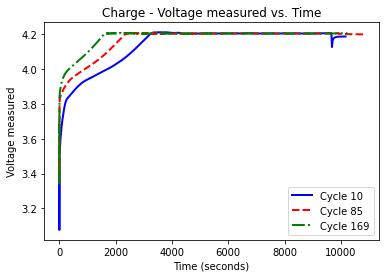

In [12]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Voltage_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage measured')
plt.title('Charge - Voltage measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [13]:
#cycle_type_C = cycle type charge
#Time_VMC = Time voltage measured Charge
#type_C = Type Charge
#Voltage_measured_C
v1v2 = max_values[['cycle_type','type', 'Voltage_measured', 'Time']].copy()
v1v2.rename(columns={'type':'type_C', 'Voltage_measured':'Voltage_measured_C', 'Time':'Time_Voltage_Measured_C'}, inplace=True)
v1v2

,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C
0,1,charge,4.209949,1534.328
1,2,charge,4.213016,3710.391
2,3,charge,4.212788,3567.969
3,4,charge,4.212924,3620.812
4,5,charge,4.212874,3813.968
...,...,...,...,...
162,165,charge,4.208913,2239.297
163,166,charge,4.209819,2395.828
164,167,charge,4.209559,2425.969
165,168,charge,4.209585,2373.031


In [14]:
#Check data type
v1v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    int64  
 1   type_C                   167 non-null    object 
 2   Voltage_measured_C       167 non-null    float64
 3   Time_Voltage_Measured_C  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current Measured vs Time - Charge

In [ ]:
cycle_list = np.arange(1,170).tolist()
for cycle in del_cycles:
    if cycle in cycle_list:
        cycle_list.remove(cycle)

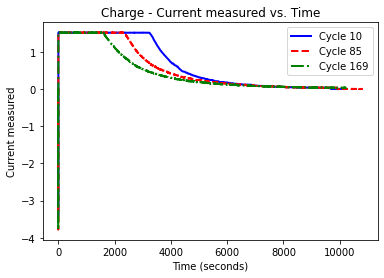

In [16]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Current_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current measured')
plt.title('Charge - Current measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v3v4 = pd.DataFrame(columns=['cycle_type','break_time'])

for idx,c in enumerate(cycle_list):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ch1[ch1['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current_measured[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v3v4.loc[idx,'cycle_type']=c
    bi = 10 + result[0]
    v3v4.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v3v4.loc[idx,'break_current']=cycle.query('index==@change_point_index').iloc[0,8]
    
v3v4.rename(columns={'break_time':'Current_measured_time_C', 'break_current':'Current_measured_C'}, inplace = True)

In [18]:
#Check data type
v3v4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    object 
 1   Current_measured_time_C  167 non-null    object 
 2   Current_measured_C       167 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.3+ KB


In [19]:
#Change data type
v3v4['cycle_type'] = v3v4['cycle_type'].astype('int64')
v3v4[['Current_measured_time_C', 'Current_measured_C']] = v3v4[['Current_measured_time_C', 'Current_measured_C']].astype('float64')

In [20]:
v3v4

,cycle_type,Current_measured_time_C,Current_measured_C
0,1,717.516,1.483595
1,2,3300.703,1.486719
2,3,3297.562,1.487924
3,4,3241.093,1.511189
4,5,3240.109,1.509954
...,...,...,...
162,165,1597.657,1.494077
163,166,1558.156,1.510962
164,167,1558.765,1.504953
165,168,1560.016,1.510319


## Temperature Measured vs Time - Charge

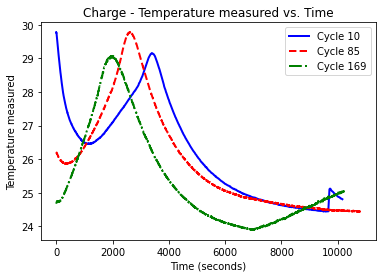

In [21]:
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Temperature_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Temperature_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Temperature_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature measured')
plt.title('Charge - Temperature measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [22]:
# Group the data by "cycle" and find the maximum temperature measured and its corresponding time
#tm = temperature measured
#Time_TMC = Time temperature meausred
tm = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])

# Reset the index of the resulting DataFrame
tm.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_temperature = tm['Temperature_measured']
max_time = tm['Time']

#create new dataframe to store variables
v5v6 = tm[['cycle_type','type', 'Temperature_measured', 'Time']].copy()
v5v6.rename(columns={'type':'type_C','Temperature_measured':'Temperature_measured_C','Time':'Time_temperature_measured_C'}, inplace=True)
v5v6

C:\Users\ibrah\AppData\Local\Temp\ipykernel_17096\3058392733.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tm = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])


,cycle_type,type_C,Temperature_measured_C,Time_temperature_measured_C
0,1,charge,27.317609,1006.094
1,2,charge,29.203048,3447.609
2,3,charge,29.334557,3419.156
3,4,charge,29.255008,3421.593
4,5,charge,29.129995,3395.125
...,...,...,...,...
162,165,charge,29.346694,1963.141
163,166,charge,29.392476,1945.328
164,167,charge,29.451853,1916.609
165,168,charge,29.487007,1912.391


In [23]:
v5v6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cycle_type                   167 non-null    int64  
 1   type_C                       167 non-null    object 
 2   Temperature_measured_C       167 non-null    float64
 3   Time_temperature_measured_C  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current at Charge vs Time - Charge

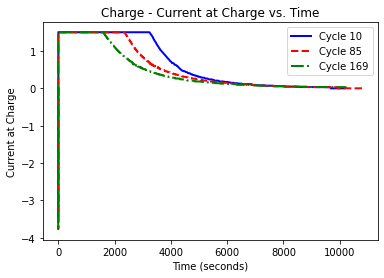

In [24]:
#Plot
# Filter data for each cycle 
cycle_10 = ch[ch['cycle_type'] == 10]
cycle_85 = ch[ch['cycle_type'] == 85]
cycle_169 = ch[ch['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Current'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current at Charge')
plt.title('Charge - Current at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Time_CaC = time current at charge
v7v8 = pd.DataFrame(columns=['cycle_type','Time'])

for idx,c in enumerate(cycle_list):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ch1[ch1['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

   # print Corresponding time
   # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]


    v7v8.loc[idx,'cycle_type']=c
    v7v8.loc[idx,'Time']=cycle.query('index==@change_point_index').iloc[0,12]
    v7v8.loc[idx,'break_current_at_charge']=cycle.query('index==@change_point_index').iloc[0,10]

v7v8.rename(columns={'Time':'Time_current_C', 'break_current_at_charge':'Current_C'},inplace=True)

In [26]:
#Check data type
v7v8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    object 
 1   Time_current_C  167 non-null    object 
 2   Current_C       167 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.3+ KB


In [27]:
#Change data type
v7v8['cycle_type'] = v7v8['cycle_type'].astype('int64')
v7v8['Time_current_C'] = v7v8['Time_current_C'].astype('float64')
v7v8

,cycle_type,Time_current_C,Current_C
0,1,717.516,1.473
1,2,3300.703,1.477
2,3,3297.562,1.477
3,4,3241.093,1.500
4,5,3240.109,1.498
...,...,...,...
162,165,1584.032,1.496
163,166,1558.156,1.498
164,167,1558.765,1.496
165,168,1573.625,1.494


## Voltage at charge vs time - Charge

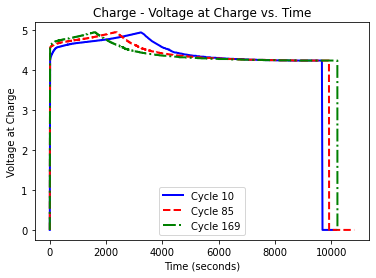

In [28]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Voltage'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage at Charge')
plt.title('Charge - Voltage at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [29]:
# Group the data by "cycle" and find the maximum temperature measured and its' corresponding time
#Time_VCC = time voltage at charge - charge
vt = ch1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmax()])

# Reset the index of the resulting DataFrame
vt.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_voltages = vt['Voltage']
max_time = vt['Time']

#create new dataframe to store variables
v9v10 = vt[['cycle_type','type', 'Voltage', 'Time']].copy()
v9v10.rename(columns={'type':'type_C','Voltage':'Voltage_C','Time':'Time_Voltage_C'}, inplace=True)
v9v10 

C:\Users\ibrah\AppData\Local\Temp\ipykernel_17096\1855440191.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vt = ch1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmax()])


,cycle_type,type_C,Voltage_C,Time_Voltage_C
0,1,charge,4.931,653.828
1,2,charge,4.931,3241.797
2,3,charge,4.942,3262.250
3,4,charge,4.942,3229.203
4,5,charge,4.942,3228.218
...,...,...,...,...
162,165,charge,4.948,1551.704
163,166,charge,4.948,1534.281
164,167,charge,4.948,1526.656
165,168,charge,4.948,1538.313


In [30]:
#Check data type
v9v10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    int64  
 1   type_C          167 non-null    object 
 2   Voltage_C       167 non-null    float64
 3   Time_Voltage_C  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Total Time per charge cycle

In [31]:
#Total time Charge var
# Group the DataFrame by "cycle" and select the maximum value of "time_seconds"
chr_total_time = ch1.groupby('cycle_type')['Time'].max()

t_tm = []
# Print the maximum time for each cycle
for cycle, chr_total_time in chr_total_time.items():
    Cycle = cycle
    chr_total_time = chr_total_time
    t_tm.append([Cycle,chr_total_time])

v11 = pd.DataFrame(t_tm, columns=['cycle_type', 'Charge Total Time'])
# t_t.rename(columns={'cycle_type':'cycle_type'},inplace=True)
v11

,cycle_type,Charge Total Time
0,1,7597.875
1,2,10516.000
2,3,10484.547
3,4,10397.890
4,5,10495.203
...,...,...
162,165,10154.094
163,166,10316.906
164,167,10571.390
165,168,9892.375


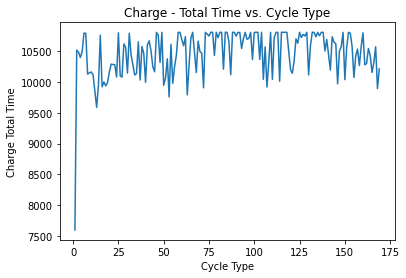

In [ ]:
#Plot
fig, ax = plt.subplots(1, 1)
ax.plot(v11['cycle_type'], v11['Charge Total Time'])
plt.xlabel('Cycle Type')
plt.ylabel('Charge Total Time')
plt.title('Charge - Total Time vs. Cycle Type')
plt.show()

In [33]:
#Check data type
v11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cycle_type         167 non-null    int64  
 1   Charge Total Time  167 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


## Capacity

In [ ]:
#Capacity per charge cycle
cap = ch1.filter(['cycle_type','type','Capacity']).drop_duplicates()
cap

,cycle_type,type,Capacity
0,1,charge,1.856487
986,2,charge,1.846327
2122,3,charge,1.835349
3254,4,charge,1.835263
4381,5,charge,1.834646
...,...,...,...
571895,165,charge,1.293464
575786,166,charge,1.288003
579726,167,charge,1.287453
583759,168,charge,1.309015


## All Charge Variables

In [35]:
merge_= ['cycle_type'] 

In [36]:
acv = pd.merge(v1v2, v3v4[merge_ + ["Current_measured_time_C", "Current_measured_C"]], how = "outer", on="cycle_type")
acv = pd.merge(acv, v5v6[merge_ +['Temperature_measured_C', 'Time_temperature_measured_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v7v8[merge_ +['Current_C', 'Time_current_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v9v10[merge_ +['Voltage_C', 'Time_Voltage_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v11, how = "outer", on="cycle_type")
acv = pd.merge(acv, cap[merge_ +['Capacity']], how = "outer", on = "cycle_type")
acv['new_cycle_type'] = np.arange(1,168)
acv

,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,Time_current_C,Voltage_C,Time_Voltage_C,Charge Total Time,Capacity,new_cycle_type
0,1,charge,4.209949,1534.328,717.516,1.483595,27.317609,1006.094,1.473,717.516,4.931,653.828,7597.875,1.856487,1
1,2,charge,4.213016,3710.391,3300.703,1.486719,29.203048,3447.609,1.477,3300.703,4.931,3241.797,10516.000,1.846327,2
2,3,charge,4.212788,3567.969,3297.562,1.487924,29.334557,3419.156,1.477,3297.562,4.942,3262.250,10484.547,1.835349,3
3,4,charge,4.212924,3620.812,3241.093,1.511189,29.255008,3421.593,1.500,3241.093,4.942,3229.203,10397.890,1.835263,4
4,5,charge,4.212874,3813.968,3240.109,1.509954,29.129995,3395.125,1.498,3240.109,4.942,3228.218,10495.203,1.834646,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,165,charge,4.208913,2239.297,1597.657,1.494077,29.346694,1963.141,1.496,1584.032,4.948,1551.704,10154.094,1.293464,163
163,166,charge,4.209819,2395.828,1558.156,1.510962,29.392476,1945.328,1.498,1558.156,4.948,1534.281,10316.906,1.288003,164
164,167,charge,4.209559,2425.969,1558.765,1.504953,29.451853,1916.609,1.496,1558.765,4.948,1526.656,10571.390,1.287453,165
165,168,charge,4.209585,2373.031,1560.016,1.510319,29.487007,1912.391,1.494,1573.625,4.948,1538.313,9892.375,1.309015,166


In [37]:
#Reorganize the columns
last_column = acv.pop(acv.columns[-1])
acv.insert(0, last_column.name, last_column)
acv

,new_cycle_type,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,Time_current_C,Voltage_C,Time_Voltage_C,Charge Total Time,Capacity
0,1,1,charge,4.209949,1534.328,717.516,1.483595,27.317609,1006.094,1.473,717.516,4.931,653.828,7597.875,1.856487
1,2,2,charge,4.213016,3710.391,3300.703,1.486719,29.203048,3447.609,1.477,3300.703,4.931,3241.797,10516.000,1.846327
2,3,3,charge,4.212788,3567.969,3297.562,1.487924,29.334557,3419.156,1.477,3297.562,4.942,3262.250,10484.547,1.835349
3,4,4,charge,4.212924,3620.812,3241.093,1.511189,29.255008,3421.593,1.500,3241.093,4.942,3229.203,10397.890,1.835263
4,5,5,charge,4.212874,3813.968,3240.109,1.509954,29.129995,3395.125,1.498,3240.109,4.942,3228.218,10495.203,1.834646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,165,charge,4.208913,2239.297,1597.657,1.494077,29.346694,1963.141,1.496,1584.032,4.948,1551.704,10154.094,1.293464
163,164,166,charge,4.209819,2395.828,1558.156,1.510962,29.392476,1945.328,1.498,1558.156,4.948,1534.281,10316.906,1.288003
164,165,167,charge,4.209559,2425.969,1558.765,1.504953,29.451853,1916.609,1.496,1558.765,4.948,1526.656,10571.390,1.287453
165,166,168,charge,4.209585,2373.031,1560.016,1.510319,29.487007,1912.391,1.494,1573.625,4.948,1538.313,9892.375,1.309015


In [39]:
acv

,new_cycle_type,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,Time_current_C,Voltage_C,Time_Voltage_C,Charge Total Time,Capacity
0,1,1,charge,4.209949,1534.328,717.516,1.483595,27.317609,1006.094,1.473,717.516,4.931,653.828,7597.875,1.856487
1,2,2,charge,4.213016,3710.391,3300.703,1.486719,29.203048,3447.609,1.477,3300.703,4.931,3241.797,10516.000,1.846327
2,3,3,charge,4.212788,3567.969,3297.562,1.487924,29.334557,3419.156,1.477,3297.562,4.942,3262.250,10484.547,1.835349
3,4,4,charge,4.212924,3620.812,3241.093,1.511189,29.255008,3421.593,1.500,3241.093,4.942,3229.203,10397.890,1.835263
4,5,5,charge,4.212874,3813.968,3240.109,1.509954,29.129995,3395.125,1.498,3240.109,4.942,3228.218,10495.203,1.834646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,165,charge,4.208913,2239.297,1597.657,1.494077,29.346694,1963.141,1.496,1584.032,4.948,1551.704,10154.094,1.293464
163,164,166,charge,4.209819,2395.828,1558.156,1.510962,29.392476,1945.328,1.498,1558.156,4.948,1534.281,10316.906,1.288003
164,165,167,charge,4.209559,2425.969,1558.765,1.504953,29.451853,1916.609,1.496,1558.765,4.948,1526.656,10571.390,1.287453
165,166,168,charge,4.209585,2373.031,1560.016,1.510319,29.487007,1912.391,1.494,1573.625,4.948,1538.313,9892.375,1.309015


In [40]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   new_cycle_type               167 non-null    int32  
 1   cycle_type                   167 non-null    int64  
 2   type_C                       167 non-null    object 
 3   Voltage_measured_C           167 non-null    float64
 4   Time_Voltage_Measured_C      167 non-null    float64
 5   Current_measured_time_C      167 non-null    float64
 6   Current_measured_C           167 non-null    float64
 7   Temperature_measured_C       167 non-null    float64
 8   Time_temperature_measured_C  167 non-null    float64
 9   Current_C                    167 non-null    float64
 10  Time_current_C               167 non-null    float64
 11  Voltage_C                    167 non-null    float64
 12  Time_Voltage_C               167 non-null    float64
 13  Charge Total Time   

# Discharge Cycle Variables

In [41]:
ds = df.query("type=='discharge'")

In [42]:
ds

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
789,2,1,1,0,discharge,24,25:41.6,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487
790,2,1,1,1,discharge,24,25:41.6,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487
791,2,1,1,2,discharge,24,25:41.6,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487
792,2,1,1,3,discharge,24,25:41.6,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487
793,2,1,1,4,discharge,24,25:41.6,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591448,337,168,613,295,discharge,24,45:42.1,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,1.325079
591449,337,168,613,296,discharge,24,45:42.1,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,1.325079
591450,337,168,613,297,discharge,24,45:42.1,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,1.325079
591451,337,168,613,298,discharge,24,45:42.1,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,1.325079


In [ ]:
#Consider Absolute values for Current values
ds['Current'] = ds['Current'].abs()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_17096\1882462090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Current'] = ds['Current'].abs()


In [ ]:
# inconsistent discharge cycle 90
del_cycles = [90]
ds1 = ds[~ds['cycle_type'].isin(del_cycles)]

## Voltage measured vs Time - Discharge

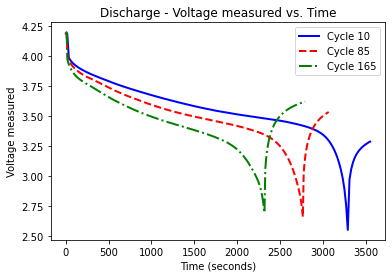

In [45]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Voltage_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage measured')
plt.title('Discharge - Voltage measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [46]:
# Group the data by "cycle" and find the minimum voltage measured and its corresponding time
min_values = ds1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmin()])

# Reset the index of the resulting DataFrame
min_values.reset_index(drop=True, inplace=True)

# Extract the minimum voltage measured and time values
min_voltages = min_values['Voltage_measured']
min_time = max_values['Time']

v12v13 = min_values[['cycle_type','type', 'Voltage_measured', 'Time']].copy()
v12v13.rename(columns={'type':'type_D', 'Voltage_measured':'Voltage_measured_D', 'Time':'Time_voltage_measured_D'}, inplace=True)
v12v13

C:\Users\ibrah\AppData\Local\Temp\ipykernel_17096\403625945.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_values = ds1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmin()])


,cycle_type,type_D,Voltage_measured_D,Time_voltage_measured_D
0,1,discharge,2.612467,3346.937
1,2,discharge,2.587209,3328.828
2,3,discharge,2.651917,3309.422
3,4,discharge,2.592948,3309.719
4,5,discharge,2.547420,3307.688
...,...,...,...,...
162,164,discharge,2.668737,2327.578
163,165,discharge,2.696396,2318.109
164,166,discharge,2.679483,2316.938
165,167,discharge,2.678714,2355.609


In [47]:
v12v13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    int64  
 1   type_D                   167 non-null    object 
 2   Voltage_measured_D       167 non-null    float64
 3   Time_voltage_measured_D  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current Measured vs Time - Discharge

In [48]:
cycle_list1 = np.arange(1,169).tolist()

In [49]:
for cycle in del_cycles:
    if cycle in cycle_list:
        cycle_list1.remove(cycle)

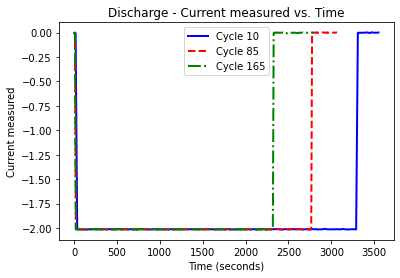

In [50]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Current_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current measured')
plt.title('Discharge - Current measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v14v15 = pd.DataFrame(columns=['cycle_type', 'break_time'])

for idx,c in enumerate(cycle_list1):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ds1[ds1['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current_measured[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time 
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v14v15.loc[idx,'cycle_type']=c
    v14v15.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v14v15.loc[idx,'Current measured']=cycle.query('index==@change_point_index').iloc[0,8]

v14v15.rename(columns={'break_time':'Time_current_measured_D', 'Current measured':'Current_measured_D'}, inplace = True)
v14v15

,cycle_type,Time_current_measured_D,Current_measured_D
0,1,3366.781,-0.004201
1,2,3269.688,-2.012772
2,3,3270.062,-2.013324
3,4,3270.219,-2.012222
4,5,3268.344,-2.013813
...,...,...,...
162,164,2298.859,-2.013868
163,165,2299.047,-2.010256
164,166,2297.969,-2.015099
165,167,2346.047,-2.014447


In [52]:
#Change data type
v14v15['cycle_type'] = v14v15['cycle_type'].astype('int64')
v14v15['Time_current_measured_D'] = v14v15['Time_current_measured_D'].astype('float64')
v14v15

,cycle_type,Time_current_measured_D,Current_measured_D
0,1,3366.781,-0.004201
1,2,3269.688,-2.012772
2,3,3270.062,-2.013324
3,4,3270.219,-2.012222
4,5,3268.344,-2.013813
...,...,...,...
162,164,2298.859,-2.013868
163,165,2299.047,-2.010256
164,166,2297.969,-2.015099
165,167,2346.047,-2.014447


In [53]:
v14v15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    int64  
 1   Time_current_measured_D  167 non-null    float64
 2   Current_measured_D       167 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.3 KB


## Temperature Measured vs Time - Discharge

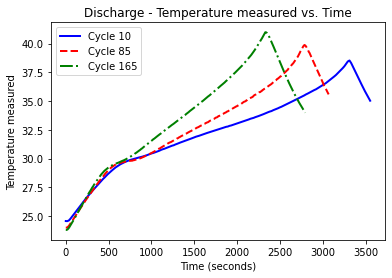

In [54]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Temperature_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Temperature_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Temperature_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature measured')
plt.title('Discharge - Temperature measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [55]:
# Group the data by "cycle" and find the maximum temperature measured and its' corresponding time
tm = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])

# Reset the index of the resulting DataFrame
tm.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_temperature = tm['Temperature_measured']
max_time = tm['Time']

#create new dataframe to store variables
v16v17 = tm[['cycle_type','type', 'Temperature_measured', 'Time']].copy()
v16v17.rename(columns={'type':'type_D','Temperature_measured':'Temperature_measured_D','Time':'Time_temperature_measured_D'}, inplace=True)
v16v17

C:\Users\ibrah\AppData\Local\Temp\ipykernel_17096\1663356851.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tm = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])


,cycle_type,type_D,Temperature_measured_D,Time_temperature_measured_D
0,1,discharge,38.982181,3366.781
1,2,discharge,39.033398,3348.735
2,3,discharge,38.818797,3329.281
3,4,discharge,38.762305,3329.500
4,5,discharge,38.665393,3327.531
...,...,...,...,...
162,164,discharge,40.983663,2346.812
163,165,discharge,40.982342,2327.750
164,166,discharge,41.063751,2336.282
165,167,discharge,41.047030,2365.219


In [56]:
v16v17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cycle_type                   167 non-null    int64  
 1   type_D                       167 non-null    object 
 2   Temperature_measured_D       167 non-null    float64
 3   Time_temperature_measured_D  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current at Charge vs time - Discharge

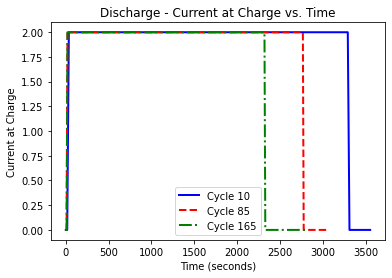

In [57]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Current'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current at Charge')
plt.title('Discharge - Current at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v18v19 = pd.DataFrame(columns=['cycle_type','break_time', 'Current'])

for idx,c in enumerate(cycle_list1):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ds1[ds1['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v18v19.loc[idx,'cycle_type']=c
    v18v19.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v18v19.loc[idx,'Current']=cycle.query('index==@change_point_index').iloc[0,10]

v18v19.rename(columns={'break_time':'Time_current_D', 'Current':'Current_D'},inplace=True)
v18v19

,cycle_type,Time_current_D,Current_D
0,1,3366.781,0.0004
1,2,3269.688,1.9982
2,3,3270.062,1.9982
3,4,3270.219,1.9982
4,5,3268.344,1.9982
...,...,...,...
162,164,2298.859,1.998
163,165,2299.047,1.998
164,166,2297.969,1.998
165,167,2346.047,1.9982


In [60]:
#Change data type
v18v19['cycle_type'] = v18v19['cycle_type'].astype('int64')
v18v19[['Time_current_D','Current_D']] = v18v19[['Time_current_D','Current_D']] .astype('float64')
v18v19

,cycle_type,Time_current_D,Current_D
0,1,3366.781,0.0004
1,2,3269.688,1.9982
2,3,3270.062,1.9982
3,4,3270.219,1.9982
4,5,3268.344,1.9982
...,...,...,...
162,164,2298.859,1.9980
163,165,2299.047,1.9980
164,166,2297.969,1.9980
165,167,2346.047,1.9982


In [61]:
v18v19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    int64  
 1   Time_current_D  167 non-null    float64
 2   Current_D       167 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.3 KB


## Voltage at Charge - Discharge

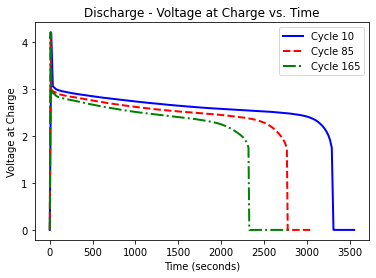

In [62]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Voltage'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage at Charge')
plt.title('Discharge - Voltage at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [63]:
# Group the data by "cycle" and find the maximum temperature measured and its' corresponding time
#Time_VCC = time voltage at charge - charge
vt = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmin()])

# Reset the index of the resulting DataFrame
vt.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_voltages = vt['Voltage']
max_time = vt['Time']

#create new dataframe to store variables
v20v21 = vt[['cycle_type','type', 'Voltage', 'Time']].copy()
v20v21.rename(columns={'type':'type_D','Voltage':'Voltage_D','Time':'Time_voltage_D'}, inplace=True)
v20v21 

C:\Users\ibrah\AppData\Local\Temp\ipykernel_17096\4036919837.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vt = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmin()])


,cycle_type,type_D,Voltage_D,Time_voltage_D
0,1,discharge,0.0,3366.781
1,2,discharge,0.0,3368.688
2,3,discharge,0.0,3329.281
3,4,discharge,0.0,3329.500
4,5,discharge,0.0,3327.531
...,...,...,...,...
162,164,discharge,0.0,2337.203
163,165,discharge,0.0,2327.750
164,166,discharge,0.0,2326.641
165,167,discharge,0.0,2365.219


In [64]:
v20v21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    int64  
 1   type_D          167 non-null    object 
 2   Voltage_D       167 non-null    float64
 3   Time_voltage_D  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Total discharge time

In [65]:
# Disharge Total Time
d_total_time = ds1.groupby('cycle_type')['Time'].max()

td_tm = []

# Print the maximum time for each cycle
for cycle, d_total_time in d_total_time.items():
    Cycle = cycle
    d_total_time = d_total_time
    td_tm.append([Cycle,d_total_time])

td_t = pd.DataFrame(td_tm, columns=['cycle_type', 'Discharge Total Time'])

td_t

,cycle_type,Discharge Total Time
0,1,3690.234
1,2,3672.344
2,3,3651.641
3,4,3631.563
4,5,3629.172
...,...,...
162,164,2793.390
163,165,2793.390
164,166,2792.485
165,167,2802.016


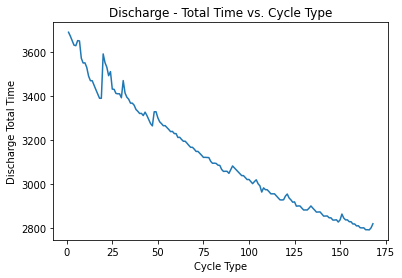

In [ ]:
#Plot
fig, ax = plt.subplots(1, 1)
ax.plot(td_t['cycle_type'], td_t['Discharge Total Time'])
plt.xlabel('Cycle Type')
plt.ylabel('Discharge Total Time')
plt.title('Discharge - Total Time vs. Cycle Type')
plt.show()

## Capacity -Discharge

In [ ]:
# View only one registry per cycle (discharge)
cap_ = ds1.filter(['cycle_type','type','Capacity']).drop_duplicates()
cap_

,cycle_type,type,Capacity
789,1,discharge,1.856487
1926,2,discharge,1.846327
3059,3,discharge,1.835349
4187,4,discharge,1.835263
5318,5,discharge,1.834646
...,...,...,...
575489,164,discharge,1.293464
579429,165,discharge,1.288003
583462,166,discharge,1.287453
587251,167,discharge,1.309015


## All discharge variables

In [68]:
merge_= ['cycle_type'] 

In [69]:
adv = pd.merge(v12v13, v14v15[merge_ + ["Time_current_measured_D", "Current_measured_D"]], how = "outer", on="cycle_type")
adv = pd.merge(adv, v16v17[merge_ + ['Temperature_measured_D', 'Time_temperature_measured_D']], how = "outer", on="cycle_type")
adv = pd.merge(adv, v18v19[merge_ + ['Current_D', 'Time_current_D']], how = "outer", on="cycle_type")
adv = pd.merge(adv, v20v21[merge_ + ['Voltage_D', 'Time_voltage_D']], how = "outer", on="cycle_type")
adv = pd.merge(adv, td_t[merge_ + ["Discharge Total Time"]], how = "outer", on="cycle_type")
adv['new_cycle_type'] = np.arange(1,168)

In [70]:
#Reorganize the columns
last_column = adv.pop(adv.columns[-1])
adv.insert(0, last_column.name, last_column)
adv

,new_cycle_type,cycle_type,type_D,Voltage_measured_D,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,1,1,discharge,2.612467,3346.937,3366.781,-0.004201,38.982181,3366.781,0.0004,3366.781,0.0,3366.781,3690.234
1,2,2,discharge,2.587209,3328.828,3269.688,-2.012772,39.033398,3348.735,1.9982,3269.688,0.0,3368.688,3672.344
2,3,3,discharge,2.651917,3309.422,3270.062,-2.013324,38.818797,3329.281,1.9982,3270.062,0.0,3329.281,3651.641
3,4,4,discharge,2.592948,3309.719,3270.219,-2.012222,38.762305,3329.500,1.9982,3270.219,0.0,3329.500,3631.563
4,5,5,discharge,2.547420,3307.688,3268.344,-2.013813,38.665393,3327.531,1.9982,3268.344,0.0,3327.531,3629.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,164,discharge,2.668737,2327.578,2298.859,-2.013868,40.983663,2346.812,1.9980,2298.859,0.0,2337.203,2793.390
163,164,165,discharge,2.696396,2318.109,2299.047,-2.010256,40.982342,2327.750,1.9980,2299.047,0.0,2327.750,2793.390
164,165,166,discharge,2.679483,2316.938,2297.969,-2.015099,41.063751,2336.282,1.9980,2297.969,0.0,2326.641,2792.485
165,166,167,discharge,2.678714,2355.609,2346.047,-2.014447,41.047030,2365.219,1.9982,2346.047,0.0,2365.219,2802.016


# All Variables

In [71]:
av = pd.merge(acv, adv, how = "outer", on = "new_cycle_type")

In [72]:
av

,new_cycle_type,cycle_type_x,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,1,1,charge,4.209949,1534.328,717.516,1.483595,27.317609,1006.094,1.473,...,3346.937,3366.781,-0.004201,38.982181,3366.781,0.0004,3366.781,0.0,3366.781,3690.234
1,2,2,charge,4.213016,3710.391,3300.703,1.486719,29.203048,3447.609,1.477,...,3328.828,3269.688,-2.012772,39.033398,3348.735,1.9982,3269.688,0.0,3368.688,3672.344
2,3,3,charge,4.212788,3567.969,3297.562,1.487924,29.334557,3419.156,1.477,...,3309.422,3270.062,-2.013324,38.818797,3329.281,1.9982,3270.062,0.0,3329.281,3651.641
3,4,4,charge,4.212924,3620.812,3241.093,1.511189,29.255008,3421.593,1.500,...,3309.719,3270.219,-2.012222,38.762305,3329.500,1.9982,3270.219,0.0,3329.500,3631.563
4,5,5,charge,4.212874,3813.968,3240.109,1.509954,29.129995,3395.125,1.498,...,3307.688,3268.344,-2.013813,38.665393,3327.531,1.9982,3268.344,0.0,3327.531,3629.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,165,charge,4.208913,2239.297,1597.657,1.494077,29.346694,1963.141,1.496,...,2327.578,2298.859,-2.013868,40.983663,2346.812,1.9980,2298.859,0.0,2337.203,2793.390
163,164,166,charge,4.209819,2395.828,1558.156,1.510962,29.392476,1945.328,1.498,...,2318.109,2299.047,-2.010256,40.982342,2327.750,1.9980,2299.047,0.0,2327.750,2793.390
164,165,167,charge,4.209559,2425.969,1558.765,1.504953,29.451853,1916.609,1.496,...,2316.938,2297.969,-2.015099,41.063751,2336.282,1.9980,2297.969,0.0,2326.641,2792.485
165,166,168,charge,4.209585,2373.031,1560.016,1.510319,29.487007,1912.391,1.494,...,2355.609,2346.047,-2.014447,41.047030,2365.219,1.9982,2346.047,0.0,2365.219,2802.016


In [73]:
# column with the name of the cell
av['Battery_id'] = "B0005"

In [74]:
#Reorganize the columns - Battery_id to be the first column
last_column = av.pop(av.columns[-1])
av.insert(0, last_column.name, last_column)
av

,Battery_id,new_cycle_type,cycle_type_x,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,...,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,B0005,1,1,charge,4.209949,1534.328,717.516,1.483595,27.317609,1006.094,...,3346.937,3366.781,-0.004201,38.982181,3366.781,0.0004,3366.781,0.0,3366.781,3690.234
1,B0005,2,2,charge,4.213016,3710.391,3300.703,1.486719,29.203048,3447.609,...,3328.828,3269.688,-2.012772,39.033398,3348.735,1.9982,3269.688,0.0,3368.688,3672.344
2,B0005,3,3,charge,4.212788,3567.969,3297.562,1.487924,29.334557,3419.156,...,3309.422,3270.062,-2.013324,38.818797,3329.281,1.9982,3270.062,0.0,3329.281,3651.641
3,B0005,4,4,charge,4.212924,3620.812,3241.093,1.511189,29.255008,3421.593,...,3309.719,3270.219,-2.012222,38.762305,3329.500,1.9982,3270.219,0.0,3329.500,3631.563
4,B0005,5,5,charge,4.212874,3813.968,3240.109,1.509954,29.129995,3395.125,...,3307.688,3268.344,-2.013813,38.665393,3327.531,1.9982,3268.344,0.0,3327.531,3629.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,B0005,163,165,charge,4.208913,2239.297,1597.657,1.494077,29.346694,1963.141,...,2327.578,2298.859,-2.013868,40.983663,2346.812,1.9980,2298.859,0.0,2337.203,2793.390
163,B0005,164,166,charge,4.209819,2395.828,1558.156,1.510962,29.392476,1945.328,...,2318.109,2299.047,-2.010256,40.982342,2327.750,1.9980,2299.047,0.0,2327.750,2793.390
164,B0005,165,167,charge,4.209559,2425.969,1558.765,1.504953,29.451853,1916.609,...,2316.938,2297.969,-2.015099,41.063751,2336.282,1.9980,2297.969,0.0,2326.641,2792.485
165,B0005,166,168,charge,4.209585,2373.031,1560.016,1.510319,29.487007,1912.391,...,2355.609,2346.047,-2.014447,41.047030,2365.219,1.9982,2346.047,0.0,2365.219,2802.016


## Organise data to save as .xlsx

In [75]:
# drop columns from AV - No longer needed
av = av.drop(columns=['cycle_type_x','cycle_type_y'])


In [76]:
# relocate Capacity to the end of the dataframe
last_column = av.pop('Capacity')
av.insert(len(av.columns), last_column.name, last_column)
av

,Battery_id,new_cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time,Capacity
0,B0005,1,charge,4.209949,1534.328,717.516,1.483595,27.317609,1006.094,1.473,...,3366.781,-0.004201,38.982181,3366.781,0.0004,3366.781,0.0,3366.781,3690.234,1.856487
1,B0005,2,charge,4.213016,3710.391,3300.703,1.486719,29.203048,3447.609,1.477,...,3269.688,-2.012772,39.033398,3348.735,1.9982,3269.688,0.0,3368.688,3672.344,1.846327
2,B0005,3,charge,4.212788,3567.969,3297.562,1.487924,29.334557,3419.156,1.477,...,3270.062,-2.013324,38.818797,3329.281,1.9982,3270.062,0.0,3329.281,3651.641,1.835349
3,B0005,4,charge,4.212924,3620.812,3241.093,1.511189,29.255008,3421.593,1.500,...,3270.219,-2.012222,38.762305,3329.500,1.9982,3270.219,0.0,3329.500,3631.563,1.835263
4,B0005,5,charge,4.212874,3813.968,3240.109,1.509954,29.129995,3395.125,1.498,...,3268.344,-2.013813,38.665393,3327.531,1.9982,3268.344,0.0,3327.531,3629.172,1.834646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,B0005,163,charge,4.208913,2239.297,1597.657,1.494077,29.346694,1963.141,1.496,...,2298.859,-2.013868,40.983663,2346.812,1.9980,2298.859,0.0,2337.203,2793.390,1.293464
163,B0005,164,charge,4.209819,2395.828,1558.156,1.510962,29.392476,1945.328,1.498,...,2299.047,-2.010256,40.982342,2327.750,1.9980,2299.047,0.0,2327.750,2793.390,1.288003
164,B0005,165,charge,4.209559,2425.969,1558.765,1.504953,29.451853,1916.609,1.496,...,2297.969,-2.015099,41.063751,2336.282,1.9980,2297.969,0.0,2326.641,2792.485,1.287453
165,B0005,166,charge,4.209585,2373.031,1560.016,1.510319,29.487007,1912.391,1.494,...,2346.047,-2.014447,41.047030,2365.219,1.9982,2346.047,0.0,2365.219,2802.016,1.309015


## SoH and RUL

In [77]:
# state of health to help calculate the RUL
cap = ch1.filter(['cycle_type','type','Capacity']).drop_duplicates()
cap

,cycle_type,type,Capacity
0,1,charge,1.856487
986,2,charge,1.846327
2122,3,charge,1.835349
3254,4,charge,1.835263
4381,5,charge,1.834646
...,...,...,...
571895,165,charge,1.293464
575786,166,charge,1.288003
579726,167,charge,1.287453
583759,168,charge,1.309015


In [78]:
cap1 = av[['new_cycle_type','Capacity']]
cap1

,new_cycle_type,Capacity
0,1,1.856487
1,2,1.846327
2,3,1.835349
3,4,1.835263
4,5,1.834646
...,...,...
162,163,1.293464
163,164,1.288003
164,165,1.287453
165,166,1.309015


In [79]:
cap1.loc[:, 'SoH'] = cap1['Capacity'] / 2
cap1

C:\Users\ibrah\AppData\Local\Temp\ipykernel_17096\2098264456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap1.loc[:, 'SoH'] = cap1['Capacity'] / 2


,new_cycle_type,Capacity,SoH
0,1,1.856487,0.928244
1,2,1.846327,0.923164
2,3,1.835349,0.917675
3,4,1.835263,0.917631
4,5,1.834646,0.917323
...,...,...,...
162,163,1.293464,0.646732
163,164,1.288003,0.644002
164,165,1.287453,0.643726
165,166,1.309015,0.654508


In [82]:
# Define the range of numbers
start_number = 167  # Example: Starting number
end_number = 0     # Example: Ending number
step = -1          # Example: Step size, negative for descending order

# Create the column with the range of numbers
cap1['RUL'] = np.arange(start_number, end_number, step)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_17096\3415426863.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap1['RUL'] = np.arange(start_number, end_number, step)


In [83]:
cap1

,new_cycle_type,Capacity,SoH,RUL
0,1,1.856487,0.928244,167
1,2,1.846327,0.923164,166
2,3,1.835349,0.917675,165
3,4,1.835263,0.917631,164
4,5,1.834646,0.917323,163
...,...,...,...,...
162,163,1.293464,0.646732,5
163,164,1.288003,0.644002,4
164,165,1.287453,0.643726,3
165,166,1.309015,0.654508,2


In [84]:
#Add SoH and RUL to av
av['SoH'] = cap1['SoH']
av['RUL'] = cap1['RUL']

In [85]:
av

,Battery_id,new_cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time,Capacity,SoH,RUL
0,B0005,1,charge,4.209949,1534.328,717.516,1.483595,27.317609,1006.094,1.473,...,38.982181,3366.781,0.0004,3366.781,0.0,3366.781,3690.234,1.856487,0.928244,167
1,B0005,2,charge,4.213016,3710.391,3300.703,1.486719,29.203048,3447.609,1.477,...,39.033398,3348.735,1.9982,3269.688,0.0,3368.688,3672.344,1.846327,0.923164,166
2,B0005,3,charge,4.212788,3567.969,3297.562,1.487924,29.334557,3419.156,1.477,...,38.818797,3329.281,1.9982,3270.062,0.0,3329.281,3651.641,1.835349,0.917675,165
3,B0005,4,charge,4.212924,3620.812,3241.093,1.511189,29.255008,3421.593,1.500,...,38.762305,3329.500,1.9982,3270.219,0.0,3329.500,3631.563,1.835263,0.917631,164
4,B0005,5,charge,4.212874,3813.968,3240.109,1.509954,29.129995,3395.125,1.498,...,38.665393,3327.531,1.9982,3268.344,0.0,3327.531,3629.172,1.834646,0.917323,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,B0005,163,charge,4.208913,2239.297,1597.657,1.494077,29.346694,1963.141,1.496,...,40.983663,2346.812,1.9980,2298.859,0.0,2337.203,2793.390,1.293464,0.646732,5
163,B0005,164,charge,4.209819,2395.828,1558.156,1.510962,29.392476,1945.328,1.498,...,40.982342,2327.750,1.9980,2299.047,0.0,2327.750,2793.390,1.288003,0.644002,4
164,B0005,165,charge,4.209559,2425.969,1558.765,1.504953,29.451853,1916.609,1.496,...,41.063751,2336.282,1.9980,2297.969,0.0,2326.641,2792.485,1.287453,0.643726,3
165,B0005,166,charge,4.209585,2373.031,1560.016,1.510319,29.487007,1912.391,1.494,...,41.047030,2365.219,1.9982,2346.047,0.0,2365.219,2802.016,1.309015,0.654508,2


# Save to excel

In [87]:
av.to_excel('AV_b05.xlsx',index=False)